In [ ]:
# default_exp datasets

# datasets

> Set of functions used to access the french text datasets.

External dependencies :
> pip install numpy

> pip install pandas

> pip install pyarrow

> pip install matplotlib

Configure tabular data display :

In [ ]:
# export
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

# French datasets for Natural Language Processing

In [ ]:
# export
from frenchtext.core import *

The config object from frenchtext.core defines the directory where the datasets will be stored if you choose to download them :

In [ ]:
config.datasets

PosixPath('/home/laurent/.frenchtext/datasets')

You can change the default location if needed :
> config["datasets_path"] = "/var/tmp"

## 1.1 List datasets

In [ ]:
# export
def list_datasets():
    return pd.read_csv(config.libdata /"datasets"/"datasets.csv",sep=';')
    
datasetsdf = list_datasets()

In [ ]:
datasetsdf

,Dataset,DatasetFile,Website,Url,Scope,UrlsFile,Pages,Words
0,Assurance,assurance,4,https://www.afer.fr/,domain,afer,148,66498
1,Assurance,assurance,5,https://www.ag2rlamondiale.fr/,domain,ag2rlamondiale,2683,1030393
2,Assurance,assurance,6,https://www.agpm.fr/,domain,agpm,267,82637
3,Assurance,assurance,7,https://www.amaguiz.com/,domain,amaguiz,706,314384
4,Assurance,assurance,10,https://www.aviva.fr/,domain,aviva,2501,792475
...,...,...,...,...,...,...,...,...
149,Wikipedia,wikipedia-4,101,https://dumps.wikimedia.org/frwiki/latest/300000,path,dumps-wikimedia-3,91984,106415763
150,Wikipedia,wikipedia-4,102,https://dumps.wikimedia.org/frwiki/latest/400000,path,dumps-wikimedia-4,64029,73602244
151,Wikipedia,wikipedia-5,102,https://dumps.wikimedia.org/frwiki/latest/400000,path,dumps-wikimedia-4,35821,42823357
152,Wikipedia,wikipedia-5,103,https://dumps.wikimedia.org/frwiki/latest/500000,path,dumps-wikimedia-5,99853,115271107


1) The text content of the main french websites in the domain of finance and business (+ wikipedia) were extracted in september 2019 using [nlptextdoc](https://github.com/laurentprudhon/nlptextdoc).

This extraction was done as "politely" as possible:
- extract only freely and publicly available content
- respect the robots.txt directives of each website (pages forbidden for indexing, maximum extraction rate)
- detect when websites use tools to prevent indexing (like Datadome) and abort the crawl

**IMPORTANT: The original authors of the websites own the copyright on all text blocks in this dataset.**

To be able to link each text block to its original author, we track the origin URL of each text block throughout the whole process.

**YOU CAN'T REUSE THE TEXT BLOCKS FOR ANY PURPOSE EXCEPT TRAINING A NATURAL LANGUAGE PROCESSING MODEL.**

See the new European copyright rules : [European Parliament approves new copyright rules for the internet](https://www.europarl.europa.eu/news/en/headlines/priorities/copyright/20190321IPR32110/european-parliament-approves-new-copyright-rules-for-the-internet)

"*The directive aims to make it easier for copyrighted material to be used freely through text and data mining, thereby removing a significant competitive disadvantage that European researchers currently face.*"

In [ ]:
print(f"=> {len(datasetsdf)-23} websites and {datasetsdf['Pages'].sum()} HTML pages")

=> 131 websites and 2564755 HTML pages


2) The text blocks were then:
- deduplicated to keep only distinct text blocks for each website (forgetting part of the original document structure), 
- tagged (but not filtered) by language (using https://fasttext.cc/docs/en/language-identification.html),
- grouped in categories according to the main theme of the original website,
- split in [Pandas](https://pandas.pydata.org/) dataframes of size < 2 GB.

In [ ]:
print(f"=> {len(datasetsdf['Dataset'].unique())} categories: {list(datasetsdf['Dataset'].unique())}")

=> 10 categories: ['Assurance', 'Banque', 'Bourse', 'Comparateur', 'Crédit', 'Forum', 'Institution', 'Presse', 'SiteInfo', 'Wikipedia']


In each dataframe, the text blocks were additionnaly **SHUFFLED IN A RANDOM ORDER** to make it very difficult to reconstruct the original articles (safety measure to help protect the copyrights of the authors).

The results of this second step can be downloaded in the *config.datasets* directory, as dataframes serialized in the [feather format](https://arrow.apache.org/docs/python/ipc.html?highlight=feather#feather-format), in files named according to the 'DatasetFile' column of the table above:
- ['DatasetFile'].dataset.feather

In [ ]:
print(f"=> {len(datasetsdf['DatasetFile'].unique())} dataset files: {list(datasetsdf['DatasetFile'].unique())}")

=> 19 dataset files: ['assurance', 'banque', 'bourse', 'comparateur', 'crédit', 'forum', 'institution', 'presse-1', 'presse-2', 'presse-3', 'presse-4', 'presse-5', 'presse-6', 'siteinfo', 'wikipedia-1', 'wikipedia-2', 'wikipedia-3', 'wikipedia-4', 'wikipedia-5']


The number of words in each text block was computed using the default french tokenizer from [spaCy](https://spacy.io/) v2.1.

This business-oriented dataset contains **2 billion french words**.

In [ ]:
print(f"=> Total number of words : {datasetsdf['Words'].sum()}")

=> Total number of words : 2008307510


The detailed contribution of each website (number of pages and number of french words kept after all filters) to each category can be studied in the datasetsdf table :

Here is a summary of the number of words contributed by each category **in millions**:

In [ ]:
np.floor(datasetsdf[["Dataset","Words"]].groupby(by="Dataset").sum()/1000000)

,Words
Dataset,
Assurance,12.0
Banque,20.0
Bourse,26.0
Comparateur,20.0
Crédit,1.0
Forum,152.0
Institution,4.0
Presse,963.0
SiteInfo,78.0


Detailed documentation for **list_datasets()** :

list_datasets() returns one row per dataset file.


Columns :

- Dataset : 10 categories ('Assurance', 'Banque', 'Bourse', 'Comparateur', 'Crédit', 'Forum', 'Institution', 'Presse', 'SiteInfo', 'Wikipedia')


- DatasetFile : 19 dataset file names, which should be passed to **read_dataset_file()** ('assurance', 'banque', 'bourse', 'comparateur', 'crédit', 'forum', 'institution', 'presse-1', 'presse-2', 'presse-3', 'presse-4', 'presse-5', 'presse-6', 'siteinfo', 'wikipedia-1', 'wikipedia-2', 'wikipedia-3', 'wikipedia-4', 'wikipedia-5')


- Website : [only used during extraction phase] unique id for each extraction job


- Url : base URL used to start crawling the website (with additional parameters when the crawl result was too big and needed to be split in several dataset files, ex : https://dumps.wikimedia.org/frwiki/latest/100000 => '/10000' was added at the end of the real base URL to register the fact that the corresponding dataset file contains the first 100000 pages of the wikipedia dump)


- Scope : the crawl starts at the base URL, ex : https://fr.wikipedia.org/wiki/Finance, and then is limited to one of 3 possible scopes : 'domain' = \*.wikipedia.org/\*, 'subdomain' : fr.wikipedia.org/\*, 'path' : fr.wikipedia.org/wiki/Finance/\*


- UrlsFile : name of the file where the original download URLs for each text block are tracked (used by the functions read_urls() and get_url_from_rowindex())


- Pages : number of pages extracted from this website


- Words : number of tokens extracted from this website (according to the default spaCy tokenizer for french), enables to see the contribution of each website to the aggregated dataset

## 1.2 Download datasets

In [ ]:
# export
def read_download_info():
    return pd.read_csv(config.libdata /"datasets"/"download_info.csv",sep=';')

downloaddf = read_download_info()

def download_all_datasets():
    for datasetfile in datasetsdf['DatasetFile'].unique():
        download_dataset_file(datasetfile)

import math
        
def download_dataset_file(datasetfile):
    row = downloaddf[downloaddf["DatasetFile"]==datasetfile].iloc[0]
    url = row["DownloadUrl"]
    size = row["FileSize"]
    print(f"Downloading dataset file : {datasetfile} ({math.floor(size/1024/1024)} MB)")
    resfile = config.datasets / (datasetfile+".dataset.feather")
    if not resfile.exists():
        download_url(url, config.datasets / (datasetfile+".dataset.zip"), size)

In [ ]:
download_dataset_file("assurance")

In [ ]:
download_all_datasets()

In [ ]:
!ls -l {config.datasets}

total 12489728
-rw-rw-rw- 1 laurent laurent   91136056 Feb 15 21:45 assurance.dataset.feather
-rw-rw-rw- 1 laurent laurent  144616048 Feb 15 21:45 banque.dataset.feather
-rw-rw-rw- 1 laurent laurent  186553136 Feb 15 21:47 bourse.dataset.feather
-rw-rw-rw- 1 laurent laurent  145062520 Feb 15 21:48 comparateur.dataset.feather
-rw-rw-rw- 1 laurent laurent   11902488 Feb 15 21:48 crédit.dataset.feather
-rw-rw-rw- 1 laurent laurent  962874856 Feb 15 21:50 forum.dataset.feather
-rw-rw-rw- 1 laurent laurent   31609912 Feb 15 21:50 institution.dataset.feather
-rw-rw-rw- 1 laurent laurent  921930504 Feb 15 21:51 presse-1.dataset.feather
-rw-rw-rw- 1 laurent laurent  855158864 Feb 15 21:54 presse-2.dataset.feather
-rw-rw-rw- 1 laurent laurent  809591952 Feb 15 21:55 presse-3.dataset.feather
-rw-rw-rw- 1 laurent laurent  958970872 Feb 15 21:56 presse-4.dataset.feather
-rw-rw-rw- 1 laurent laurent 1153696120 Feb 15 22:01 presse-5.dataset.feather
-rw-rw-rw- 1 laurent laurent 1452331608 Feb 15 22:0

## 1.3 Read dataset files

In [ ]:
# export
def read_dataset_file(datasetfile):
    datasetdffile = config.datasets / (datasetfile+".dataset.feather")
    if(datasetdffile.exists()):
        datasetdf = pd.read_feather(datasetdffile)
        print(f"Loaded dataframe for dataset {datasetfile} : {len(datasetdf)} text blocks")
        return datasetdf
    else:
        raise Exception(f"No dataframe for dataset {datasetfile}")

In [ ]:
datasetdf = read_dataset_file("assurance")

Loaded dataframe for dataset assurance : 563613 text blocks


In [ ]:
datasetdf

,Website,DocId,DocEltType,DocEltCmd,NestingLevel,Text,Lang,Words,Unique
0,11,22332,ListItem,Text,2,5 tournages catastrophe pour un assureur,fr,6,True
1,74,710,Section,Start,1,Tout connaitre sur la nouvelle formation post-...,fr,7,True
2,11,12082,TextBlock,Text,1,Votre Agent Mandataire AXA - Civry Marie Claud...,?,18,True
3,87,461,TextBlock,Text,4,60 ans et 4 mois,fr,5,True
4,7,200,TextBlock,Text,1,Mon devis sur mesure,fr,4,True
...,...,...,...,...,...,...,...,...,...
563608,138,255,Section,Start,2,Les autres pouvoirs de police,fr,5,True
563609,11,19483,TextBlock,Text,1,Yves Nicolau assurance Laon,?,4,True
563610,106,1644,ListItem,Text,3,Evènements sportifs,fr,2,True
563611,58,4155,Section,Start,1,Agence Groupama Chalon,?,3,True


The **dataset files** contain the following columns :

- Website : unique **id of the website** (extraction job) from which the text block was extracted 


- DocId : unique identifier for each page of the website

=> these two columns can be used to join with the datasets list table and the datasets urls table


- DocEltType/DocEltCmd : Document structure delimiters and document content elements
  - Document Start / Document End : beginning / end of a page
    - Document Title : title of the page
    - Document Url : url of the page
  - Section Start / Section End : chapter or section delimited in the page
    - Section Title : title of the section
    - NestingLevel : sections can be nested at several levels of depth
    - TextBlock Text : paragraph or block of text inside a section
  - List Start / List End : list of elements
  - NavigationList Start / NavigationList End : navigation menu
    - ListItem Text : text of a list element   
    - NestingLevel : lists can be nested inside each other
  - Table Start / Table End : beginning / end of a table
    - TableHeader/TableCell Start / TableHeader/TableCell End : beginning / end of a table cell
      - TextBlock Text : paragraph or block of text inside a table cell
    - NestingLevel : tables can be nested inside each other
 
 => a dataset file contains only **content text blocks** (Title and Text elements)
 
 
 - NestingLevel : the extraction algorithm ([nlptextdoc](https://github.com/laurentprudhon/nlptextdoc)) tries very hard to preserve the hierarchical structure of the text in the source web page
 
 
 - Text : Unicode text for document content elements lines (DocEltCmd = 'Title' or 'Text')
 
 
 - Lang : language of the text block in the Text column, as detected by [fastText](https://fasttext.cc/docs/en/language-identification.html)
 
 
 - Words : number of words of the text block in the Text column,after tokenization by [spaCy](https://spacy.io/)
 
 
 - Unique : True for the very first occurence of the text block in the current website (extraction file), False for all subsequent occurences of this same text block in this extraction file 
 
 => always True because the deduplication filter was already applied when the dataset file was created

ADDITIONAL INFO :

- the text blocks are **shuffled in random order** : it is impossible to rebuild the original web pages from the dataset files (by design to protect the copyrights)


- only **unique** text blocks from each website are kept


- the **origin each text block is tracked** with the (Website,DocId) columns => can be used to join with the urls files (again by design to protect the copyrights)

**Note** : before using a dataset file to train a model, you should filter it on language and number of words.

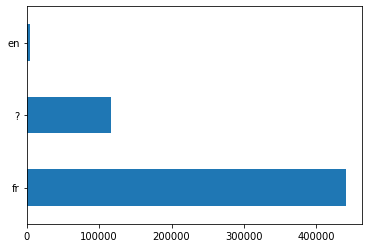

In [ ]:
datasetdf["Lang"].value_counts()[:3].plot.barh()

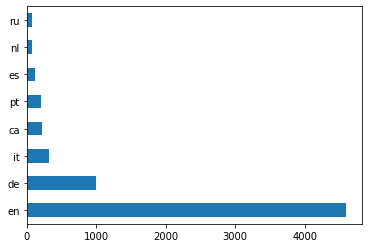

In [ ]:
datasetdf["Lang"].value_counts()[2:10].plot.barh()

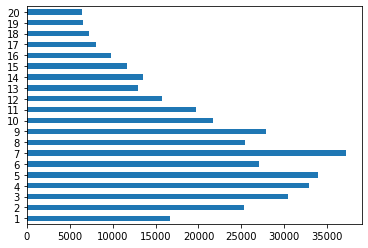

In [ ]:
datasetdf["Words"].value_counts().sort_index()[:20].plot.barh()

In [ ]:
datasetdf[datasetdf["Words"]<7]["Words"].count()

166275

In [ ]:
datasetdf[(datasetdf["Words"]>=7) & (datasetdf["Words"]<20)]["Words"].count()

217568

In [ ]:
datasetdf[(datasetdf["Words"]>=20) & (datasetdf["Words"]<100)]["Words"].count()

166004

In [ ]:
datasetdf[datasetdf["Words"]>=100]["Words"].count()

13766

## 1.4 Read URLs files

In [ ]:
# export
def download_urls_file():
    row = downloaddf[downloaddf["DatasetFile"]=="urls"].iloc[0]
    url = row["DownloadUrl"]
    size = row["FileSize"]
    print(f"Downloading datasets urls file ({math.floor(size/1024/1024)} MB)")
    download_url(url, config.datasets / "datasets.urls.feather", size)
    print("Done")

urlsdf = None
    
def read_urls_file():
    global urlsdf
    if urlsdf is None:
        download_urls_file()
        urlsdf = pd.read_feather(config.datasets / "datasets.urls.feather")
        print(f"Loaded datasets urls : {len(urlsdf)} urls")
        return urlsdf
    else:
        raise Exception(f"Datasets urls file not found")

During each website extraction, a corresponding **urls file** was created to track the urls and stats of all documents included in the extraction.

A single table containing all urls for all datasets can be read with the **read_urls_file()** function.

If the urls file wasn't downloaded before, it will be automatically downloaded.

In [ ]:
read_urls_file()

Done
Loaded datasets urls : 2668787 urls


,Website,DocId,DocUrl,Words,fr,en,de,es,?,%fr,%en,%de,%es,%?
0,4,1,https://www.afer.fr/,573.0,524.0,3.0,0.0,0.0,46.0,0.914485,0.005236,0.0,0.0,0.080279
1,4,2,https://www.afer.fr/afer/adhesion/,74.0,74.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000
2,4,3,https://www.afer.fr/afer/adhesion/adherent-ass...,475.0,457.0,5.0,0.0,0.0,13.0,0.962105,0.010526,0.0,0.0,0.027368
3,4,4,https://www.afer.fr/afer/adhesion/adherer-assu...,519.0,519.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000
4,4,5,https://www.afer.fr/afer/adhesion/parrainage-a...,355.0,345.0,0.0,0.0,0.0,10.0,0.971831,0.000000,0.0,0.0,0.028169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668782,104,15427,https://fr.wikipedia.org/wiki/___L_t,1277.0,1274.0,0.0,0.0,0.0,3.0,0.997651,0.000000,0.0,0.0,0.002349
2668783,104,15428,https://fr.wikipedia.org/wiki/___r_nad_S_zavou,387.0,382.0,0.0,0.0,0.0,5.0,0.987080,0.000000,0.0,0.0,0.012920
2668784,104,15429,https://fr.wikipedia.org/wiki/___suivre_,3816.0,3816.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000
2668785,104,15430,https://fr.wikipedia.org/wiki/___The_Heavens_a...,419.0,405.0,14.0,0.0,0.0,0.0,0.966587,0.033413,0.0,0.0,0.000000


**read_urls_file()** returns one row per page extracted from a given website.

Columns :

- Website : unique **id of the website** (extraction job) from which the text blocks were extracted 


- DocId : unique identifier for each page of the website, same as 'DocId' column in extraction file


- DocUrl : ansolute url (with query string) from which the page contents were extracted


- Words : total number of words in the text block of this page


- fr/en/es/de/? : number of words in text blocks for each language


- %fr/%en/%es/%de/%? : % words in text blocks of the page for each language (can be used to filter datasets)

## 1.5 Utility functions to use dataset files

### Filter and iterate over the rows of a dataset file

In [ ]:
# export
def get_rows_from_datasetdf(datasetdf, minwords=5, maxwords=None, lang=None):
    condition = datasetdf.index>=0
    if isinstance(minwords,int):
        condition = condition & (datasetdf["Words"] >= minwords)
    if isinstance(maxwords,int):
        condition = condition & (datasetdf["Words"] <= maxwords)
    if isinstance(lang,str):
        condition = condition & (datasetdf["Lang"] == lang)
    return datasetdf[condition].iterrows()

def show_first_rows(rowsiterator, count=5, skip=0):
    i=0
    for rowidx,row in rowsiterator:   
        i = i+1
        if(i <= skip): continue
        text = row["Text"]
        print(f"{rowidx} - {text}") 
        if(i >= skip+count): break

In [ ]:
rowsiterator = get_rows_from_datasetdf(datasetdf)
show_first_rows(rowsiterator, skip=5)

7 - De la même manière, lorsque l’acheteur est titulaire d’un diplôme de mécanique, les juges apprécieront sa qualité de « professionnel » et pourront rejeter sa demande. En effet, ils pourront estimer qu’il aurait dû ou pu déceler le problème rencontré ultérieurement.
9 - Lorsque vous souscrivez à une assurance classique, vous avez systématiquement le choix entre plusieurs formules, qui proposent différentes garanties. Et bien, concernant les assurances auto connectée, c’est pareil. Et ce n’est pas parce qu’il y a des réductions à la clé qu’il faut en oublier de vérifier les conditions du contrat auquel vous souscrivez !
10 - Même si c’est un budget important, il vaut mieux payer en une seule fois. En effet, le paiement mensuel revient plus cher car il occasionne des frais supplémentaires.
11 - Les agences Groupama à proximité de l'agence Olonzac
13 - Generali Vie applique ce transfert des plus-values latentes :


In [ ]:
rowsiterator = get_rows_from_datasetdf(datasetdf, minwords=None, maxwords=5, lang="?")
show_first_rows(rowsiterator,10)

12 - COORDONNEES
41 - 01 30 41 67 33
49 - Dmitriy G.
57 - Les atouts du Multisupport CONFIANCE
74 - 01XXL meribel hiver
76 - Garantie en cas de vol
87 - Par AXA, le 01/08/2016
96 - mgr@enderby.eu
127 - 18 place De Strasbourg
131 - Saint Gaudens


### Filter and iterate over the text blocks of a full dataset (across multiple files)

In [ ]:
# export
def get_textblocks_from_dataset(dataset, minwords=5, maxwords=None, lang=None):
    for datasetfile in datasetsdf.loc[datasetsdf["Dataset"]==dataset,"DatasetFile"].unique():
        datasetdf = read_dataset_file(datasetfile)
        for rowidx,row in get_rows_from_datasetdf(datasetdf,minwords,maxwords,lang):
            yield row["Text"]
        
def show_first_textblocks(textiterator, count=5, skip=0):
    i=0
    for text in textiterator:   
        i = i+1
        if(i <= skip): continue
        print(f"{i} - {text}") 
        if(i >= (skip+count)): break

In [ ]:
textiterator = get_textblocks_from_dataset("Assurance", minwords=None, maxwords=10, lang="fr")
show_first_textblocks(textiterator,skip=2000,count=10)

Loaded dataframe for dataset assurance : 563613 text blocks
2001 - Rééquipement à neuf à vie
2002 - Définition Conducteur secondaire- Lexique
2003 - Comment éviter les fraudes
2004 - Comment demander un remboursement santé - GENERALI
2005 - Simulateur pour connaître les obligations de votre accord de branche
2006 - Complémentaire Epargne retraite des indépendants et TNS - Malakoff Médéric
2007 - Experts-Comptables, découvrez la mission épargne salariale
2008 - Vous n’êtes pas encore client :
2009 - Actualités (Page 6) | ameli.fr | Pharmacien
2010 - Dépression : quelle prise en charge ? - Matmut


### Access a specific row - Retrieve the Url from which this text block was extracted

In [ ]:
# export
def get_text_from_rowindex(datasetdf, rowidx):
    return datasetdf.iloc[rowidx]["Text"]

def get_url_from_rowindex(datasetdf, rowidx):
    global urlsdf
    row = datasetdf.iloc[rowidx]
    website = row["Website"]
    docid = row["DocId"]
    if urlsdf is None:
        urlsdf = read_urls_file()
    url = urlsdf.loc[(urlsdf["Website"] == website) & (urlsdf["DocId"] == docid),"DocUrl"].values[0]
    return url

In [ ]:
get_text_from_rowindex(datasetdf,100)

'Les inondations de plaine : débordement de cours d’eau avec une durée d’immersion longue (prévisibles plusieurs jours ou heures à l’avance).'

In [ ]:
get_url_from_rowindex(datasetdf,100)

'https://www.maif.fr/conseils-prevention/risques-majeurs/inondation.html'

### Find text blocks with a specific char or substring

In [ ]:
# export
def find_textblocks_with_chars(datasetdf, chars, count=100, ctxsize=20, wrap=False):
    if isinstance(chars,int): chars = chr(chars)
    textsWithWord = datasetdf[datasetdf["Text"].str.contains(chars,regex=False)]
    if count>0 and (textsWithWord["Text"].count()>count):
        textsWithWord = textsWithWord.sample(count)
    return textsWithWord["Text"].apply(lambda t: getContextAroundWord(t,chars,ctxsize,wrap))

def getContextAroundWord(text,word,ctxsize=20,wrap=False):
    idx = text.index(word)
    start = max(idx-ctxsize,0)
    padbefore = -min(idx-ctxsize,0)
    end = min(idx+len(word)+ctxsize,len(text))
    passage = text[start:end+1].replace(chr(160)," ")
    if(wrap):
        passage = passage.replace(word,"["+word+"]")
    padafter = (2*ctxsize+len(word)+1)-len(passage)-padbefore
    if(wrap):
        padafter = padafter+2
    paddedpassage = (" "*padbefore) + passage + (" "*padafter)
    return paddedpassage

In [ ]:
find_textblocks_with_chars(datasetdf,"rétroviseur",count=20,ctxsize=15)

549610    ème avec votre rétroviseur, il se peut que
123839     vitre brisée, rétroviseur endommagé voire
234116    ects, dans les rétroviseurs intérieurs et 
544490    a fixation des rétroviseurs intérieurs et 
485535    essoire sur le rétroviseur intérieur      
113829    tilisation des rétroviseurs ou des clignot
560539    tionnement des rétroviseurs.              
341116     de glaces aux rétroviseurs, feux arrière 
503691    er, hormis les rétroviseurs !             
485907     ampoules, les rétroviseurs et le toit ouv
339917    liers dans les rétroviseurs… C’est une act
496069    et onéreuses : rétroviseurs électriques, r
171367    t utilisez vos rétroviseurs               
439278    ortière rayée, rétroviseur cassé, tags : l
433579    garde dans tes rétroviseurs avant d’ouvrir
452691    bilité dans le rétroviseur extérieur ou si
107934    nt varier. Les rétroviseurs et les blocs-p
155443     même pour les rétroviseurs : si vous n’av
541277    atigue dans le rétroviseur : le vôtr

In [ ]:
find_textblocks_with_chars(datasetdf,64257,count=10,wrap=True)

530109    ’à leur élimination [ﬁ]nale , même lorsque l
504865    estisseur est simpli[ﬁ]ée lorsque le bail es
143023    udiants modestes en [ﬁ]nançant des épiceries
432161    s, dont certains pro[ﬁ]ls présentent un risq
16437      et individuelle con[ﬁ]rmant ainsi sa positi
357361    r des segments spéci[ﬁ]ques ont été égalemen
479694    nt règlementaire et [ﬁ]nancier, La Mondiale 
139684    alisation. Selon la [ﬁ]scalité en vigueur au
283976    ève de la catégorie [ﬁ]scale des revenus fon
487638     la lutte contre la [ﬁ]nance de l’ombre limi
Name: Text, dtype: object

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_core.ipynb.
Converted 01_datasets.ipynb.
Converted 02_chars.ipynb.
Converted index.ipynb.
